In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import seaborn as sn

In [4]:
url=('loan.csv')
data=pd.read_csv(url)

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
data.columns=['ID','Gender','Married','Depend','Edu','Self_emp','I1','I2','Loan_Amount','Loan_Amount_Term','Credit','Area']

In [7]:
data.head()

,ID,Gender,Married,Depend,Edu,Self_emp,I1,I2,Loan_Amount,Loan_Amount_Term,Credit,Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
temp=data.drop(['Depend'],axis='columns')
temp.drop(['ID'],axis='columns',inplace=True)
temp.head()

,Gender,Married,Edu,Self_emp,I1,I2,Loan_Amount,Loan_Amount_Term,Credit,Area
0,Male,Yes,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
temp['Gender']=label_encoder.fit_transform(data['Gender'])
temp['Edu']=label_encoder.fit_transform(data['Edu'])
temp['Self_emp']=label_encoder.fit_transform(data['Self_emp'])
temp['Area']=label_encoder.fit_transform(data['Area'])
temp['Married']=label_encoder.fit_transform(data['Married'])
temp.head()

,Gender,Married,Edu,Self_emp,I1,I2,Loan_Amount,Loan_Amount_Term,Credit,Area
0,1,1,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,0,0,2340,2546,100.0,360.0,NaN,2
4,1,0,1,0,3276,0,78.0,360.0,1.0,2


In [10]:
temp['Gender'] = temp['Gender'].fillna(0)
temp['Married'] = temp['Married'].fillna(0)
temp['Edu'] = temp['Edu'].fillna(0)
temp['Self_emp'] = temp['Self_emp'].fillna(0)
temp['I1'] = temp['I1'].fillna(0)
temp['I2'] = temp['I2'].fillna(0)
temp['Loan_Amount'] = temp['Loan_Amount'].fillna(0)
temp['Loan_Amount_Term'] = temp['Loan_Amount_Term'].fillna(0)
temp['Credit'] = temp['Credit'].fillna(0)
temp['Area'] = temp['Area'].fillna(0)

In [11]:
temp['Loan_Amount'] = temp['Loan_Amount'].astype(int)
temp['Loan_Amount_Term'] = temp['Loan_Amount_Term'].astype(int)
temp['Credit'] = temp['Credit'].astype(int)
temp.head()

,Gender,Married,Edu,Self_emp,I1,I2,Loan_Amount,Loan_Amount_Term,Credit,Area
0,1,1,0,0,5720,0,110,360,1,2
1,1,1,0,0,3076,1500,126,360,1,2
2,1,1,0,0,5000,1800,208,360,1,2
3,1,1,0,0,2340,2546,100,360,0,2
4,1,0,1,0,3276,0,78,360,1,2


In [12]:
temp.isnull().values.any()

False

In [13]:
data['Depend'] = pd.to_numeric(data['Depend'], errors='coerce')
data['Depend'] = data['Depend'].fillna(0)
data['Depend'] = data['Depend'].astype(int)
target=data['Depend']
target

0      0
1      1
2      2
3      2
4      0
      ..
362    0
363    0
364    0
365    0
366    0
Name: Depend, Length: 367, dtype: int32

In [14]:
target.isnull().values.any()

False

In [15]:
x_train, x_test, y_train, y_test = train_test_split(temp, target, test_size = 0.2)

In [16]:
# Using KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
ans=KNeighborsClassifier(n_neighbors=3)

In [19]:
ans.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
k=ans.score(x_test,y_test)
print(k)

0.6081081081081081


In [21]:
ans.predict_proba(x_test)

array([[0.66666667, 0.        , 0.33333333],
       [0.66666667, 0.        , 0.33333333],
       [0.33333333, 0.        , 0.66666667],
       [0.66666667, 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.66666667, 0.        , 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.        , 0.66666667],
       [0.66666667, 0.        , 0.33333333],
       [1.        , 0.        , 0.        ],
       [0.66666667, 0.        , 0.33333333],
       [0.66666667, 0.        , 0.33333333],
       [0.66666667, 0.33333333, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.

<AxesSubplot:>

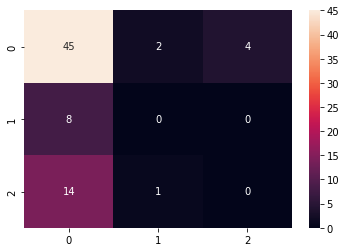

In [22]:
y_pred=ans.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
plt.figure()
sn.heatmap(cm, annot=True)

In [23]:
print(classification_report(y_test, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00        23
   macro avg       0.00      0.00      0.00        23
weighted avg       0.00      0.00      0.00        23



C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [24]:
# Using Logistic regression 

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
x_train,x_test,y_train,y_test=train_test_split(temp,target,test_size=0.2)

In [27]:
model_lr=LogisticRegression(max_iter=10000)
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [28]:
score=model_lr.score(x_test,y_test)
print(score)

0.6351351351351351


In [29]:
model_lr.predict_proba(x_test)

array([[0.72009902, 0.22997427, 0.04992671],
       [0.52352715, 0.23887201, 0.23760084],
       [0.87469597, 0.06425149, 0.06105254],
       [0.78535171, 0.11000826, 0.10464004],
       [0.65034633, 0.17636892, 0.17328475],
       [0.68511499, 0.26375143, 0.05113357],
       [0.56082341, 0.36045991, 0.07871668],
       [0.9126538 , 0.05204256, 0.03530364],
       [0.70634761, 0.16968008, 0.12397231],
       [0.59223388, 0.26883347, 0.13893265],
       [0.89219685, 0.07460292, 0.03320023],
       [0.80585049, 0.09619577, 0.09795374],
       [0.6073134 , 0.18658445, 0.20610214],
       [0.53949814, 0.29198783, 0.16851403],
       [0.68444902, 0.21810751, 0.09744348],
       [0.36784053, 0.24683948, 0.38531999],
       [0.40742821, 0.29969029, 0.2928815 ],
       [0.71697407, 0.23614513, 0.0468808 ],
       [0.4436917 , 0.21119631, 0.34511199],
       [0.86572778, 0.1140811 , 0.02019113],
       [0.68812523, 0.11316096, 0.19871381],
       [0.43650422, 0.1296264 , 0.43386938],
       [0.

<AxesSubplot:>

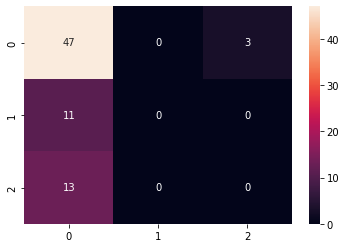

In [30]:
y_pred=model_lr.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
plt.figure()
sn.heatmap(cm, annot=True)

In [31]:
print(classification_report(y_test, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00        24
   macro avg       0.00      0.00      0.00        24
weighted avg       0.00      0.00      0.00        24



C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [32]:
# Using Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
x_train,x_test,y_train,y_test=train_test_split(temp,target,test_size=0.2)

In [35]:
model_linear=LinearRegression().fit(x_train,y_train)

In [36]:
score=model_linear.score(x_test,y_test)
print(score)

0.05788680851754735


<AxesSubplot:>

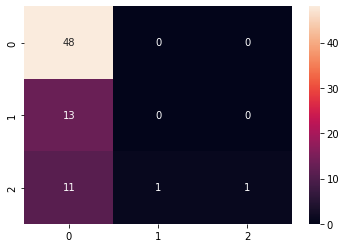

In [37]:
y_pred=model_lr.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
plt.figure()
sn.heatmap(cm, annot=True)

In [38]:
print(classification_report(y_test, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       1.00      0.08      0.14        13
           3       0.00      0.00      0.00         0

   micro avg       0.50      0.04      0.07        26
   macro avg       0.33      0.03      0.05        26
weighted avg       0.50      0.04      0.07        26



C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [39]:
#Using Decision Tree

In [40]:
x_train, x_test, y_train, y_test = train_test_split(temp, target, test_size = 0.2)

In [41]:
from sklearn.tree import DecisionTreeClassifier
ans1=DecisionTreeClassifier()

In [42]:
ans1.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
ans1.score(x_test,y_test)

0.4594594594594595

In [44]:
ans1.predict_proba(x_test[0:20])

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

<AxesSubplot:>

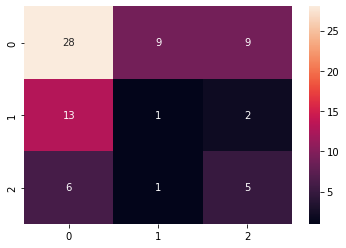

In [45]:
y_pred=ans1.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
plt.figure()
sn.heatmap(cm, annot=True)

In [46]:
print(classification_report(y_test, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.09      0.06      0.07        16
           2       0.31      0.42      0.36        12
           3       0.00      0.00      0.00         0

   micro avg       0.22      0.21      0.22        28
   macro avg       0.13      0.16      0.14        28
weighted avg       0.19      0.21      0.20        28



C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [47]:
#Using SVM

In [48]:
x_train, x_test, y_train, y_test = train_test_split(temp, target, test_size = 0.2)

In [49]:
from sklearn.svm import SVC

In [50]:
model=SVC()

In [51]:
history1=model.fit(x_train,y_train)

In [52]:
ans3=model.score(x_test,y_test);
print(ans3)

0.7702702702702703


<AxesSubplot:>

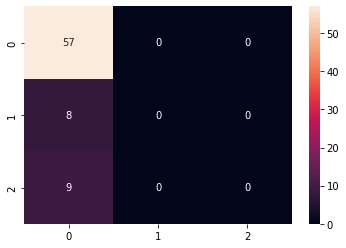

In [53]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
plt.figure()
sn.heatmap(cm, annot=True)

In [54]:
print(classification_report(y_test, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00        17
   macro avg       0.00      0.00      0.00        17
weighted avg       0.00      0.00      0.00        17



C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hartej Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [55]:
# Score of SVM = 62.16%, Decision Tree = 59.45%, Linear Regression = 8.14%, Logistic Regression = 74.32%, KNN = 52.70%


In [56]:
# Hence we get the best result when we use Logistic technique

# Support Vector Machine (SVM) is a relatively simple Supervised Machine Learning Algorithm used for 
#classification and/or regression. It is more preferred for classification but is sometimes very useful for 
#regression as well. Basically, SVM finds a hyper-plane that creates a boundary between the types of data.

#Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised 
#Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

In [ ]:
bar_x=['KNN','Logisitc','Linear','Decision Tree','SVM']
bar_y=